 # K-means

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
import geopandas as gpd
import contextily as ctx

In [3]:
from sklearn.cluster import KMeans

In [4]:
df = pd.read_csv("/Users/egorgusev/Анализ данных/Задание 3/ALL_SPB_STOPS.csv", sep=';', encoding='Windows-1251', decimal=',')

In [5]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df)

      ID_STOP                                          STOP_NAME  \
0      100101                                     Пр.Ветеранов-1   
1      100102                                     Пр.Ветеранов-2   
2      100103                                    Ленинский пр.-1   
3      100104                                    Ленинский пр.-2   
4      100105                                             Автово   
5      100106                                    Кировский завод   
6      100107                                           Нарвская   
7      100108                                         Балтийская   
8      100109                                         Пушкинская   
9      100110                                       Владимирская   
10     100111                                    Пл. Восстания-1   
11     100112                                    Пл. Восстания-2   
12     100113                                       Чернышевская   
13     100114                                   

In [6]:
#Выделяем координаты выходов из метро
metro = df[df['ID_STOP'].astype('str').str.match('100')]

In [7]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(metro)

    ID_STOP                   STOP_NAME          LATITUDE         LONGITUDE
0    100101              Пр.Ветеранов-1  59.8416038827508  30.2539842396693
1    100102              Пр.Ветеранов-2  59.8420417837763    30.25008403131
2    100103             Ленинский пр.-1  59.8516834239607  30.2683847248898
3    100104             Ленинский пр.-2  59.8497096845857  30.2683477910985
4    100105                      Автово  59.8672920598579  30.2611327749718
5    100106             Кировский завод  59.8797529383961  30.2616313811541
6    100107                    Нарвская  59.9010643542386   30.274818591331
7    100108                  Балтийская  59.9074279378188  30.2997858342371
8    100109                  Пушкинская  59.9205142694969  30.3296781982105
9    100110                Владимирская  59.9276107242842   30.348374083357
10   100111             Пл. Восстания-1  59.9315849272904  30.3604957536555
11   100112             Пл. Восстания-2  59.9294900866043  30.3609241856343
12   100113 

In [8]:
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.LONGITUDE, df.LATITUDE))
gdf.crs = "EPSG:4326"
gdf.head()

ID_STOP        STOP_NAME          LATITUDE         LONGITUDE  \
0   100101   Пр.Ветеранов-1  59.8416038827508  30.2539842396693   
1   100102   Пр.Ветеранов-2  59.8420417837763    30.25008403131   
2   100103  Ленинский пр.-1  59.8516834239607  30.2683847248898   
3   100104  Ленинский пр.-2  59.8497096845857  30.2683477910985   
4   100105           Автово  59.8672920598579  30.2611327749718   

                    geometry  
0  POINT (30.25398 59.84160)  
1  POINT (30.25008 59.84204)  
2  POINT (30.26838 59.85168)  
3  POINT (30.26835 59.84971)  
4  POINT (30.26113 59.86729)

In [9]:
gmetro = gpd.GeoDataFrame(
    metro, geometry=gpd.points_from_xy(metro.LONGITUDE, metro.LATITUDE))
gmetro.crs = "EPSG:4326"

In [10]:
gdf.to_crs(epsg=3310,inplace=True)
gmetro.to_crs(epsg=3310,inplace=True)

### Странция метро Приморская

In [28]:
near = gdf[gdf.distance(gmetro.geometry[44]) < 1000]
near.to_crs(epsg=4326,inplace=True)
near

/opt/anaconda3/lib/python3.7/site-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


ID_STOP                                      STOP_NAME  \
44     100301                                     Приморская   
291     14903                        Метро "Приморская" (10)   
293     14906    Улица Нахимова / Наличная улица (9, 10, 11)   
295     14908                  Набережная реки Смоленки (10)   
369     15001            Улица Кораблестроителей, 35 (9, 11)   
373     15006  Улица Кораблестроителей (конечная, 9, 10, 11)   
426     15059                        Метро "Приморская" (10)   
431     15063                                 Универсам (10)   
438     15070                    Уральская улица (9, 10, 11)   
1012    15667                           Уральская улица (10)   
1015    15671                                 Универсам (10)   
1018    15675                     Улица Нахимова, 18 (9, 11)   
1317    15973     Улица Кораблестроителей Т (конечная, 1, 6)   
1331    15987                       Уральская улица T (1, 6)   
1342    15999                             Универсам T (1, 6)   
1349    16006                    Метро "Приморская" T (1, 6)   
1352    16009                        Улица Нахимова T (1, 6)   
1563    16228                        Улица Нахимова T (1, 6)   
1566    16230                    Метро "Приморская" T (1, 6)   
1570    16234                             Универсам T (1, 6)   
1575    16239                       Уральская улица T (1, 6)   
1989     1665                        МАГАЗИН "СТРОИТЕЛЬ" [7]   
2121    16777                Улица Кораблестроителей (9, 11)   
2129    16787                         Улица Нахимова (9, 11)   
2131    16793                            Улица Нахимова (10)   
2353     1730                      НОВОСМОЛЕНСКАЯ НАБ.,2 [7]   
2355     1731                      НОВОСМОЛЕНСКАЯ НАБ.,6 [7]   
2641    18067                      ЖЕЛЕЗНОВОДСКАЯ УЛ. [128]<   
2642    18068                     СТАНЦИЯ МЕТРО "ПРИМОРСКАЯ"   
2685    18115                  СТ. МЕТРО "ПРИМОРСКАЯ" [128]<   
2686    18116                         УЛ. ОДОЕВСКОГО, 28 []<   
2687    18119                    ПР. КИМА, УГ. УРАЛЬСКОЙ УЛ.   
2723    18209                ЖЕЛЕЗНОВОДСКАЯ УЛ., УГ. ПР.КИМА   
4449    20878                      НОВОСМОЛЕНСКАЯ НАБ.(ТЕСТ)   
4461     2095                     СТ. МЕТРО "ПРИМОРСКАЯ" [7]   
4462     2096                         СТ. МЕТРО "ПРИМОРСКАЯ"   
4682    22165                            А.С. "НАЛИЧНАЯ УЛ."   
4768     2246                   УЛ. КОРАБЛЕСТРОИТЕЛЕЙ [1, 6]   
4774     2248                   УЛ. КОРАБЛЕСТРОИТЕЛЕЙ,35 [7]   
4836     2278                            УЛ. НАХИМОВА [1, 6]   
4840     2279                            УЛ. НАХИМОВА,18 [7]   
5270    24237                НАЛИЧНАЯ УЛ., УГ. УРАЛЬСКОЙ УЛ.   
5273     2424                      УНИВЕРСАМ "ГАВАНСКИЙ" [6]   
5694    25831                                       ПР. КИМа   
5853    27084            Улица Кораблестроителей (9, 10, 11)   
6115     2870                       МАГАЗИН "СТРОИТЕЛЬ" [7]<   
6119     2875        МАЛЫЙ ПР. В.О.,УГ. НАЛИЧНОЙ УЛ. [6, 1]<   
6146     2908             НАЛИЧНАЯ УЛ. УГ. УЛ. НАХИМОВА [7]<   
6161     2925                     НОВОСМОЛЕНСКАЯ НАБ.,6 [7]<   
6424     3284                    СТ. МЕТРО "ПРИМОРСКАЯ" [7]<   
6425     3285                         СТ. МЕТРО "ПРИМОРСКАЯ"   
6531     3428                          УЛ. КОРАБЛЕСТРОИТЕЛЕЙ   
6533     3430                  УЛ. КОРАБЛЕСТРОИТЕЛЕЙ,35 [7]<   
6561     3465                           УЛ. НАХИМОВА [1, 6]<   
6669     3605                     УНИВЕРСАМ "ГАВАНСКИЙ" [6]<   
7144     4988               ПР. КИМа, УГ. ЖЕЛЕЗНОВОДСКОЙ УЛ.   
7145     4989                                 УЛ. ОДОЕВСКОГО   
7146     4990                       УЛ. ОДОЕВСКОГО 28 [тест]   
7147     4992                УРАЛЬСКАЯ УЛ., УГ. НАЛИЧНОЙ УЛ.   
7148     4993                  УГОЛ ПР. КИМА И УРАЛЬСКОЙ УЛ.   

               LATITUDE         LONGITUDE                   geometry  
44      59.948558526973  30.23

In [29]:
near = pd.DataFrame(near.drop(columns=['geometry', 'ID_STOP', 'STOP_NAME']))

In [30]:
near['LATITUDE'] = pd.to_numeric(near['LATITUDE'])
near['LONGITUDE'] = pd.to_numeric(near['LONGITUDE'])
near.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 44 to 7148
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LATITUDE   60 non-null     float64
 1   LONGITUDE  60 non-null     float64
dtypes: float64(2)
memory usage: 1.4 KB


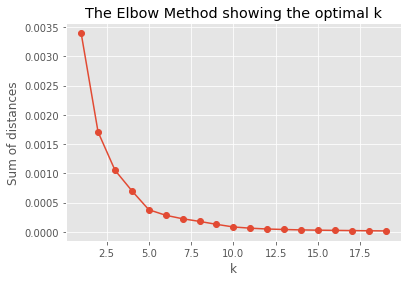

In [31]:
K = range(1, 20)
models = [KMeans(n_clusters=k, random_state=42).fit(near) for k in K]
dist = [model.inertia_ for model in models]

# Plot the elbow
plt.plot(K, dist, marker='o')
plt.xlabel('k')
plt.ylabel('Sum of distances')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [32]:
model = KMeans(n_clusters=11, random_state=42)
model.fit(near)
near['cluster'] = model.labels_
near.groupby('cluster')

In [33]:
near.head()

LATITUDE  LONGITUDE  cluster
44   59.948559  30.234443        1
291  59.948804  30.231600        4
293  59.942403  30.231199        6
295  59.946803  30.230499        4
369  59.956181  30.225388        7

In [34]:
gnear = gpd.GeoDataFrame(
    near, geometry=gpd.points_from_xy(near.LONGITUDE, near.LATITUDE))
gnear.crs = "EPSG:4326"
gnear.head()

LATITUDE  LONGITUDE  cluster                   geometry
44   59.948559  30.234443        1  POINT (30.23444 59.94856)
291  59.948804  30.231600        4  POINT (30.23160 59.94880)
293  59.942403  30.231199        6  POINT (30.23120 59.94240)
295  59.946803  30.230499        4  POINT (30.23050 59.94680)
369  59.956181  30.225388        7  POINT (30.22539 59.95618)

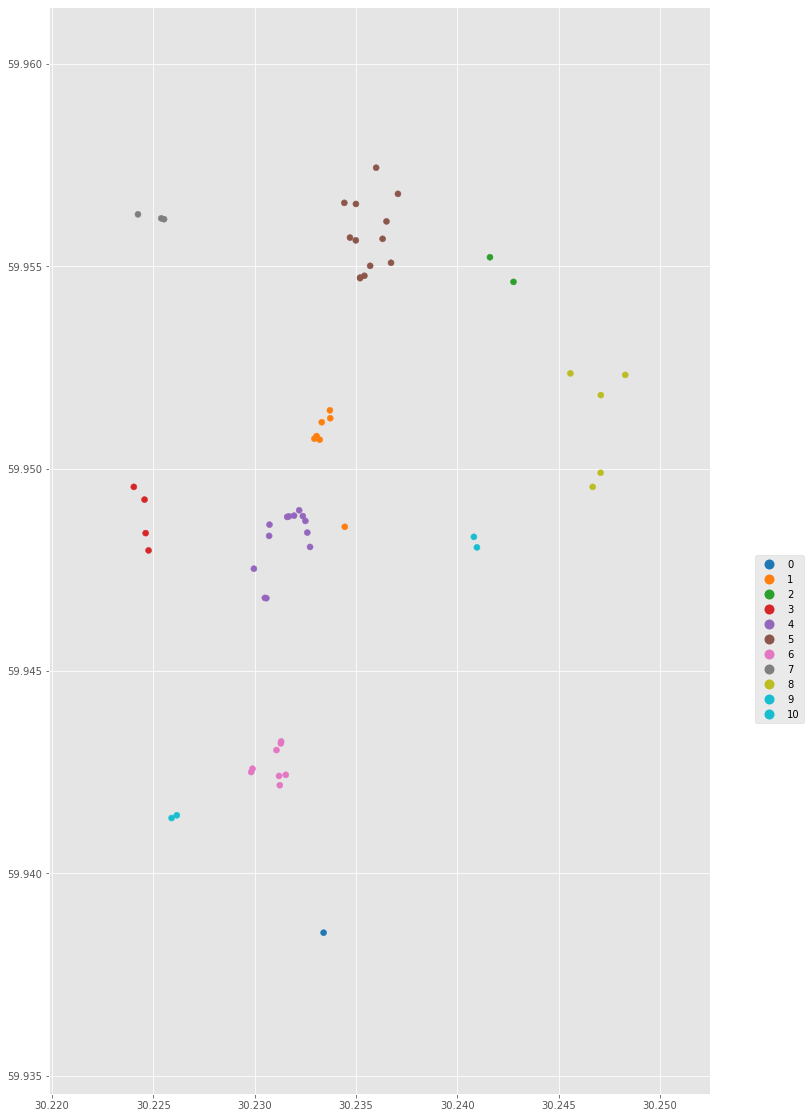

In [35]:
fig, ax = plt.subplots(figsize=(20, 20))

gnear.plot(column='cluster',
                categorical=True,
                legend=True,
                ax=ax)

# Adjust legend location
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.15,0.5))

plt.show()

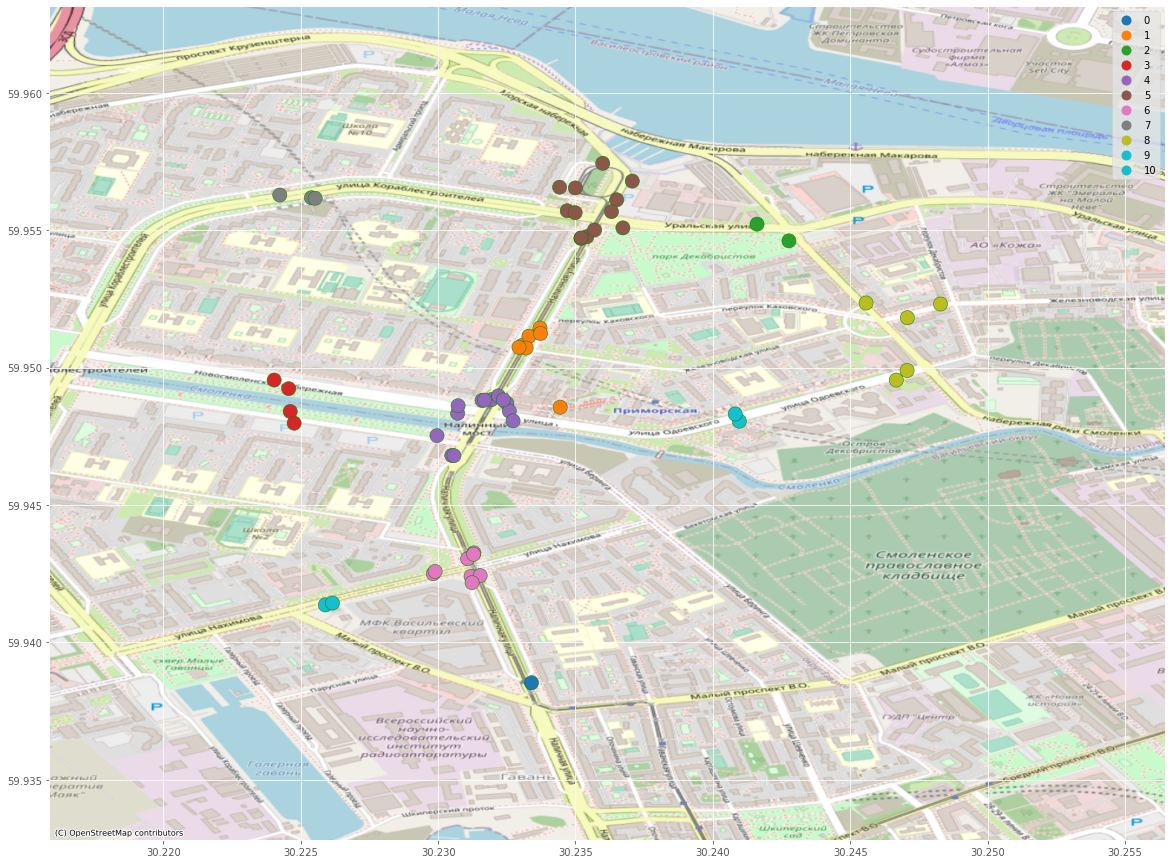

In [36]:
ax = gnear.plot(column='cluster',
                categorical=True,
                legend=True,
               figsize=(20, 30), alpha=1, edgecolor='g', markersize= 200)
ctx.add_basemap(ax, 
                crs=gnear.crs.to_string(), 
                source=ctx.providers.OpenStreetMap.Mapnik)

### Новый Петергоф

In [37]:
near = gdf[gdf.distance(gdf.geometry[4585]) < 1500]
near.to_crs(epsg=4326,inplace=True)
near.head()

/opt/anaconda3/lib/python3.7/site-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


ID_STOP                                          STOP_NAME  \
118      1344                        АЛЕКСАНДРИЯ [200, 210, 359]   
143      1381      БОЛЬНИЦА [200, 210, 351, 355, 356, 356Б, 359]   
240     14744              КОНСТАНТИНОВСКАЯ УЛ. [354, 355][тест]   
2508     1785               ПЛОЩАДЬ АВРОВА [351, 355, 356, 356Б]   
3538     1938  ПРАВЛЕНСКАЯ УЛ. [200, 210, 351, 355, 356, 356Б...   

               LATITUDE   LONGITUDE                   geometry  
118   59.87510160324203  29.9439621  POINT (29.94396 59.87510)  
143   59.87858424964328  29.9199829  POINT (29.91998 59.87858)  
240   59.87244138346619  29.9140396  POINT (29.91404 59.87244)  
2508   59.8744742767776  29.9211941  POINT (29.92119 59.87447)  
3538  59.88031515370266   29.907999  POINT (29.90800 59.88032)

In [38]:
near = pd.DataFrame(near.drop(columns=['geometry', 'ID_STOP', 'STOP_NAME']))

In [39]:
near['LATITUDE'] = pd.to_numeric(near['LATITUDE'])
near['LONGITUDE'] = pd.to_numeric(near['LONGITUDE'])

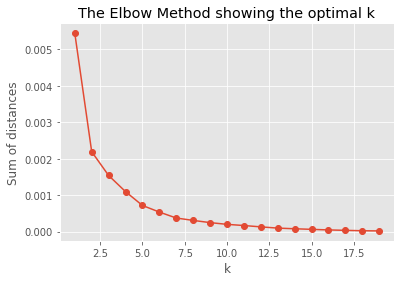

In [40]:
K = range(1, 20)
models = [KMeans(n_clusters=k, random_state=42).fit(near) for k in K]
dist = [model.inertia_ for model in models]

# Plot the elbow
plt.plot(K, dist, marker='o')
plt.xlabel('k')
plt.ylabel('Sum of distances')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [41]:
model = KMeans(n_clusters=16, random_state=42)
model.fit(near)
near['cluster'] = model.labels_
near.groupby('cluster')

In [42]:
near.head()

LATITUDE  LONGITUDE  cluster
118   59.875102  29.943962        4
143   59.878584  29.919983        1
240   59.872441  29.914040       14
2508  59.874474  29.921194       15
3538  59.880315  29.907999       12

In [43]:
gnear = gpd.GeoDataFrame(
    near, geometry=gpd.points_from_xy(near.LONGITUDE, near.LATITUDE))
gnear.crs = "EPSG:4326"
gnear.head()

LATITUDE  LONGITUDE  cluster                   geometry
118   59.875102  29.943962        4  POINT (29.94396 59.87510)
143   59.878584  29.919983        1  POINT (29.91998 59.87858)
240   59.872441  29.914040       14  POINT (29.91404 59.87244)
2508  59.874474  29.921194       15  POINT (29.92119 59.87447)
3538  59.880315  29.907999       12  POINT (29.90800 59.88032)

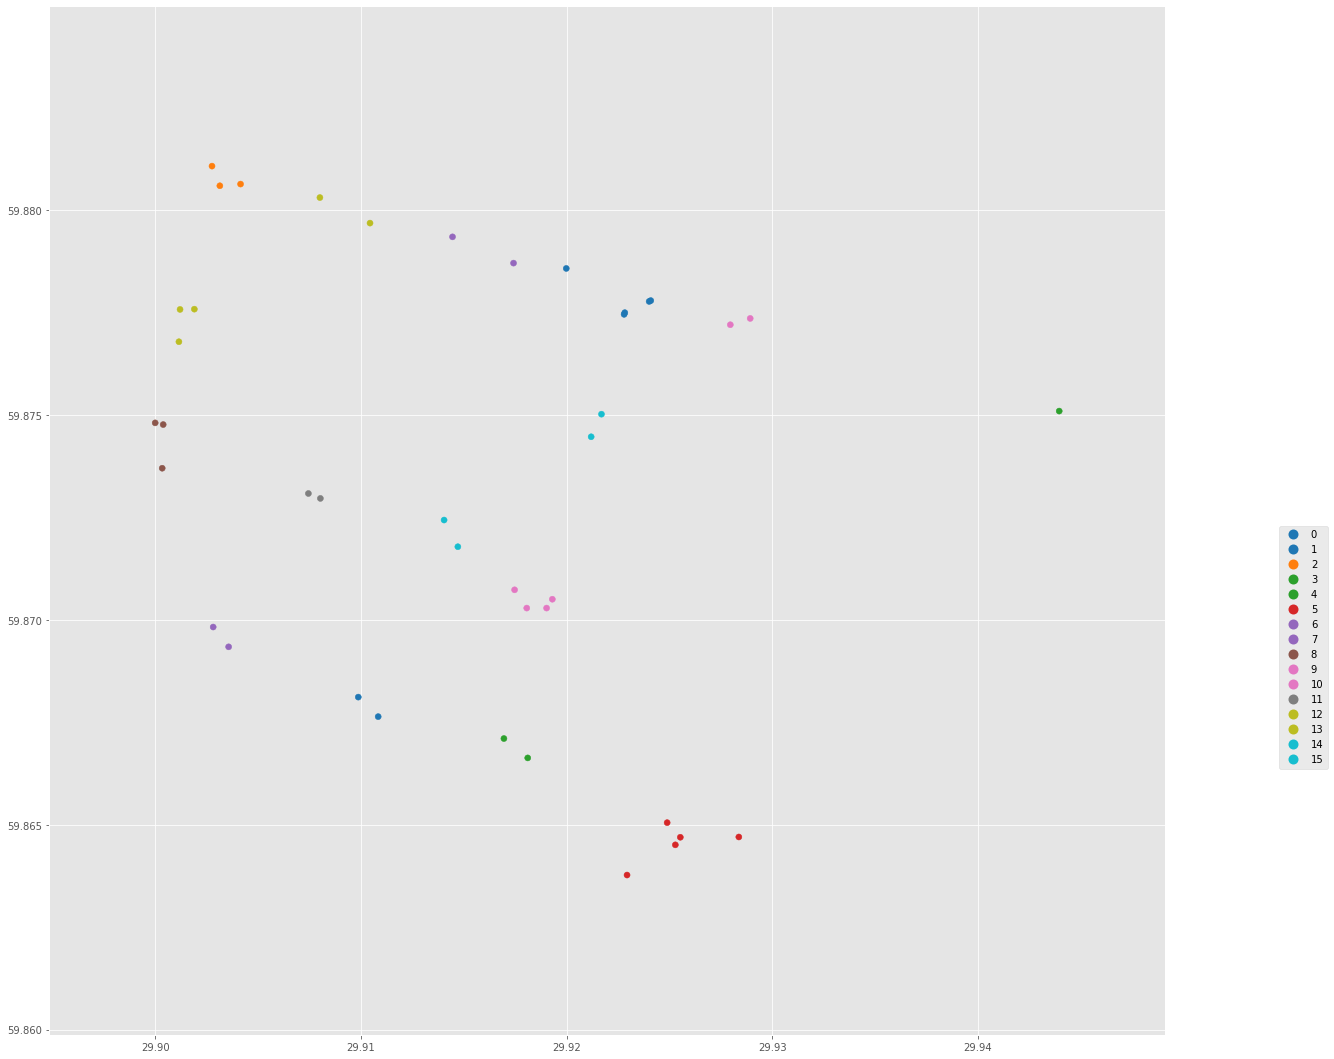

In [44]:
fig, ax = plt.subplots(figsize=(20, 20))

gnear.plot(column='cluster',
                categorical=True,
                legend=True,
                ax=ax)

# Adjust legend location
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.15,0.5))

plt.show()

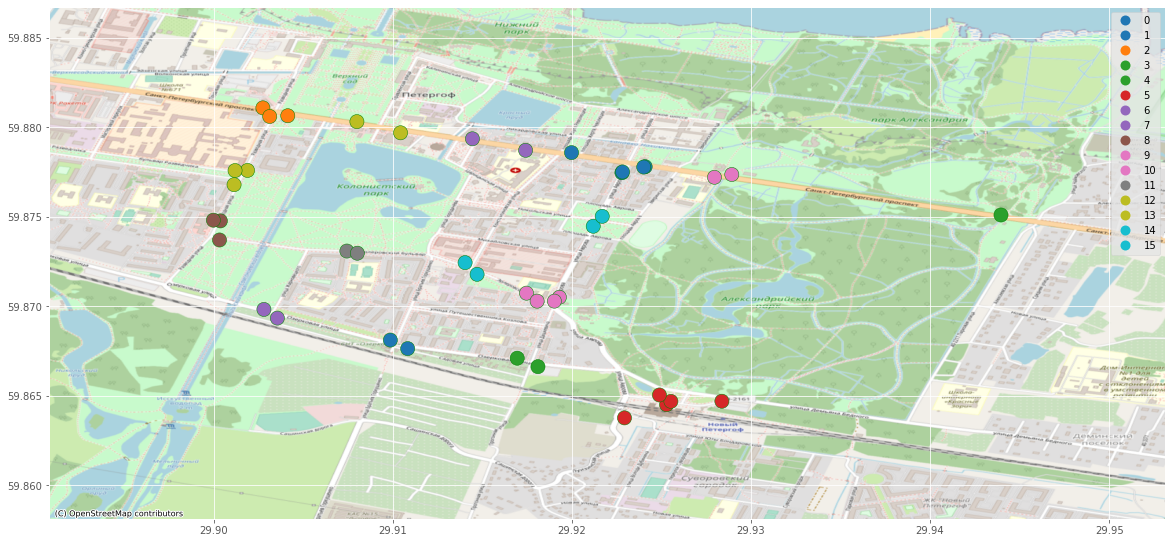

In [45]:
ax = gnear.plot(column='cluster',
                categorical=True,
                legend=True,
               figsize=(20, 30), alpha=1, edgecolor='g', markersize= 200)
ctx.add_basemap(ax, 
                crs=gnear.crs.to_string(), 
                source=ctx.providers.OpenStreetMap.Mapnik)

### Странция метро Василеостровская

In [42]:
near = gdf[gdf.distance(gmetro.geometry[45]) < 1000]
near.to_crs(epsg=4326,inplace=True)
near.head()

/opt/anaconda3/lib/python3.7/site-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


ID_STOP                                   STOP_NAME           LATITUDE  \
45   100302                            Василеостровская   59.9427134003301   
74   100530                                Спортивная-2   59.9477969616639   
76     1285      12-13 ЛИНИИ (ПО СРЕДНЕМУ ПР. В.О.) [6]  59.94112057347588   
77     1287                             18-19 ЛИНИИ [6]    59.938797516478   
78     1290  1-Я И КАДЕТСКАЯ ЛИНИЯ,УГ. СРЕДНЕГО ПР. [6]  59.94453814792944   

           LONGITUDE                   geometry  
45  30.2783051412278  POINT (30.27831 59.94271)  
74  30.2836697744112  POINT (30.28367 59.94780)  
76        30.2717571  POINT (30.27176 59.94112)  
77        30.2641411  POINT (30.26414 59.93880)  
78        30.2870083  POINT (30.28701 59.94454)

In [43]:
near = pd.DataFrame(near.drop(columns=['geometry', 'ID_STOP', 'STOP_NAME']))

In [44]:
near['LATITUDE'] = pd.to_numeric(near['LATITUDE'])
near['LONGITUDE'] = pd.to_numeric(near['LONGITUDE'])
near.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 45 to 7150
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LATITUDE   49 non-null     float64
 1   LONGITUDE  49 non-null     float64
dtypes: float64(2)
memory usage: 1.1 KB


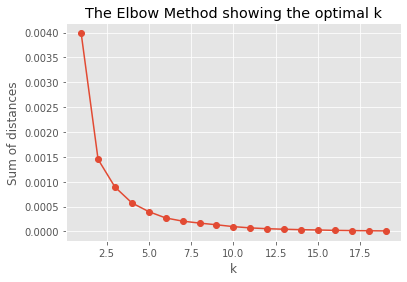

In [45]:
K = range(1, 20)
models = [KMeans(n_clusters=k, random_state=42).fit(near) for k in K]
dist = [model.inertia_ for model in models]

# Plot the elbow
plt.plot(K, dist, marker='o')
plt.xlabel('k')
plt.ylabel('Sum of distances')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [46]:
model = KMeans(n_clusters=13, random_state=42)
model.fit(near)
near['cluster'] = model.labels_
near.groupby('cluster')

In [47]:
gnear = gpd.GeoDataFrame(
    near, geometry=gpd.points_from_xy(near.LONGITUDE, near.LATITUDE))
gnear.crs = "EPSG:4326"
gnear.head()

LATITUDE  LONGITUDE  cluster                   geometry
45  59.942713  30.278305        6  POINT (30.27831 59.94271)
74  59.947797  30.283670        8  POINT (30.28367 59.94780)
76  59.941121  30.271757        7  POINT (30.27176 59.94112)
77  59.938798  30.264141        2  POINT (30.26414 59.93880)
78  59.944538  30.287008        3  POINT (30.28701 59.94454)

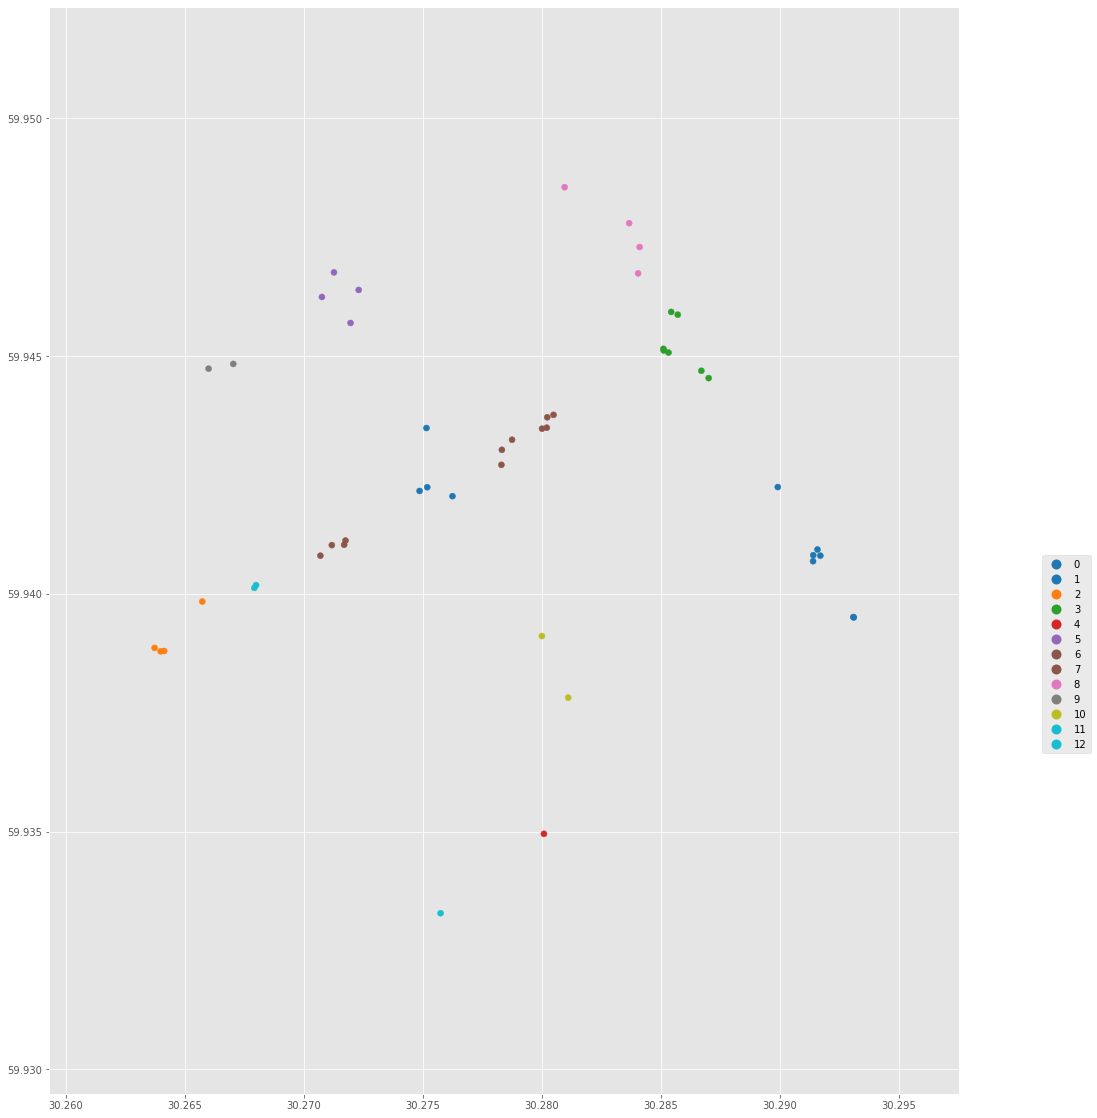

In [48]:
fig, ax = plt.subplots(figsize=(20, 20))

gnear.plot(column='cluster',
                categorical=True,
                legend=True,
                ax=ax)

# Adjust legend location
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.15,0.5))

plt.show()

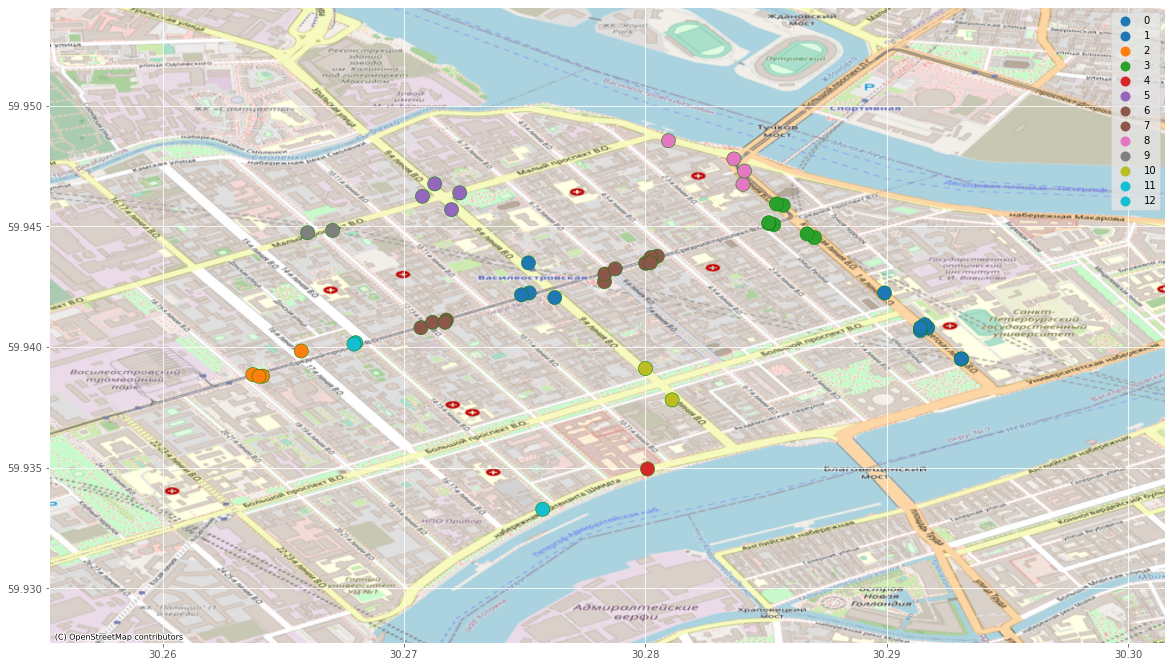

In [49]:
ax = gnear.plot(column='cluster',
                categorical=True,
                legend=True,
               figsize=(20, 30), alpha=1, edgecolor='g', markersize= 200)
ctx.add_basemap(ax, 
                crs=gnear.crs.to_string(), 
                source=ctx.providers.OpenStreetMap.Mapnik)